In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data  = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Get rid of unnecessary columns

In [4]:
data.drop(['CustomerID'], inplace=True, axis=1)

In [5]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# one hot encoding of categorical columns

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
gender = data['Gender']

In [8]:
hot_labels = pd.get_dummies(gender)

In [9]:
final = hot_labels.drop('Male', axis=1)
data['Gender'] = final

In [10]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


# Normalize numerical data

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
data.iloc[:, 1:] = sc.fit_transform(data.iloc[:, 1:])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,-1.424569,-1.738999,-0.434801
1,0,-1.281035,-1.738999,1.195704
2,1,-1.352802,-1.700830,-1.715913
3,1,-1.137502,-1.700830,1.040418
4,1,-0.563369,-1.662660,-0.395980


# Building K-means clustering model

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [14]:
sse = []
for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(data)
    sse.append(model.inertia_)

Text(0, 0.5, 'Inertia')

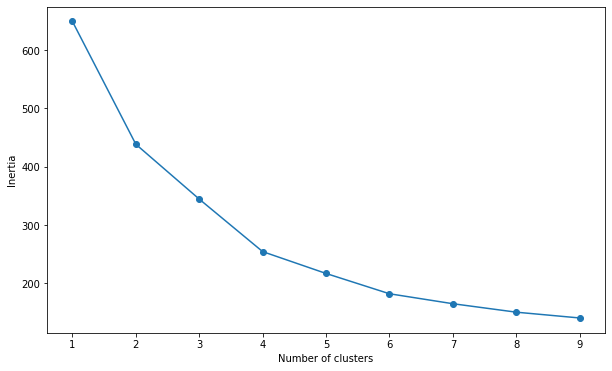

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [21]:
# Build a model with number of clusters as 4
model4 = KMeans(n_clusters=4)
model4.fit(data)
print('Silhouette score:', silhouette_score(data, model4.labels_, metric='euclidean'))

Silhouette score: 0.35027020434653977


# Visualize the clusters

In [22]:
clusters = model4.predict(data)

In [24]:
data['labels'] = clusters

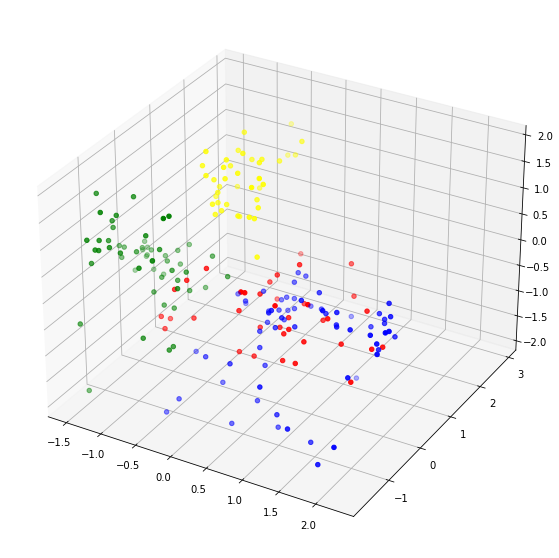

In [26]:
plt.figure(figsize=(21, 10))
axes = plt.subplot(111, projection='3d')
axes.scatter(data.Age[data.labels==0], 
             data['Annual Income (k$)'][data.labels==0], 
             data['Spending Score (1-100)'][data.labels==0],
             c = 'blue')
axes.scatter(data.Age[data.labels==1], 
             data['Annual Income (k$)'][data.labels==1], 
             data['Spending Score (1-100)'][data.labels==1],
             c = 'red')
axes.scatter(data.Age[data.labels==2], 
             data['Annual Income (k$)'][data.labels==2], 
             data['Spending Score (1-100)'][data.labels==2],
             c = 'green')
axes.scatter(data.Age[data.labels==3], 
             data['Annual Income (k$)'][data.labels==3], 
             data['Spending Score (1-100)'][data.labels==3],
             c = 'yellow')

# Principal Component Analysis(PCA)

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=4)

In [52]:
features = pd.DataFrame(pca.fit_transform(data), columns=[0,1, 2,3])
components = pca.fit_transform(data)

In [49]:
final = pd.DataFrame(data=pca.explained_variance_ratio_, index=range(pca.n_components_), columns=['ratio'])

In [50]:
final

,ratio
0,0.535700
1,0.225756
2,0.148983
3,0.054709


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='ratio'>

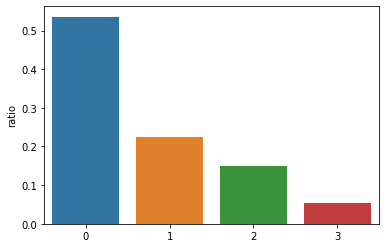

In [51]:
x = range(pca.n_components_)
sns.barplot([0,1,2,3], 'ratio', data=final)

In [53]:
pca_data = pd.DataFrame(components)

In [54]:
inertia = []
for k in range(1,10):
    modelx = KMeans(n_clusters=k)
    modelx.fit(pca_data)
    inertia.append(modelx.inertia_)

<AxesSubplot:>

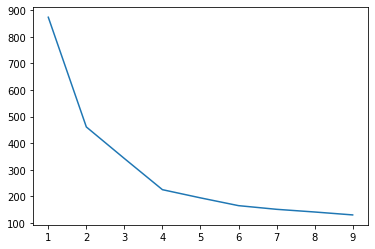

In [55]:
sns.lineplot(x=range(1,10),y=inertia)

In [56]:
modelx = KMeans(n_clusters=4)
modelx.fit(pca_data.iloc[:, :2])

KMeans(n_clusters=4)

In [57]:
print('score is:', silhouette_score(pca_data.iloc[:, :2], modelx.labels_, metric='euclidean'))

score is: 0.5439954377981033


In [58]:
pca_data['labels'] = modelx.labels_

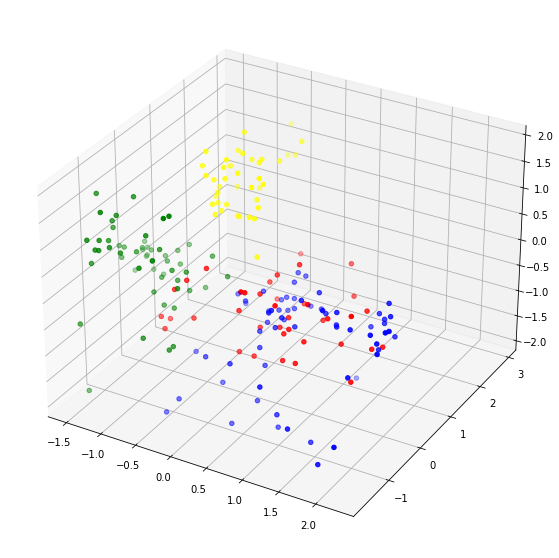

In [60]:
plt.figure(figsize=(21, 10))
axes = plt.subplot(111, projection='3d')
axes.scatter(data.Age[pca_data.labels==0], 
             data['Annual Income (k$)'][pca_data.labels==0], 
             data['Spending Score (1-100)'][pca_data.labels==0],
             c = 'blue')
axes.scatter(data.Age[pca_data.labels==1], 
             data['Annual Income (k$)'][pca_data.labels==1], 
             data['Spending Score (1-100)'][pca_data.labels==1],
             c = 'red')
axes.scatter(data.Age[pca_data.labels==2], 
             data['Annual Income (k$)'][pca_data.labels==2], 
             data['Spending Score (1-100)'][pca_data.labels==2],
             c = 'green')
axes.scatter(data.Age[pca_data.labels==3], 
             data['Annual Income (k$)'][pca_data.labels==3], 
             data['Spending Score (1-100)'][pca_data.labels==3],
             c = 'yellow')

# cluster analysis

In [61]:
df = pd.read_csv('Mall_Customers.csv')

In [65]:
df.drop(['CustomerID'], axis=1, inplace=True)
df['cluster'] = modelx.predict(pca_data.iloc[:, :2])

In [66]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [67]:
avg_df = df.groupby(['cluster'], as_index=False).mean()

In [71]:
avg_df

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,53.953125,47.218750,40.046875
1,1,39.794872,86.307692,19.974359
2,2,25.438596,40.000000,60.298246
3,3,32.875000,86.100000,81.525000


<AxesSubplot:xlabel='cluster', ylabel='Spending Score (1-100)'>

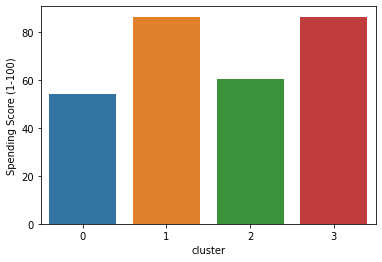

In [74]:
sns.barplot(x='cluster', y='Age', data=avg_df)



<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

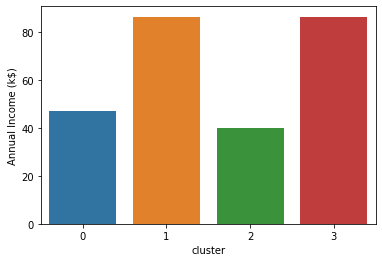

In [75]:
sns.barplot(x='cluster', y='Annual Income (k$)', data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Spending Score (1-100)'>

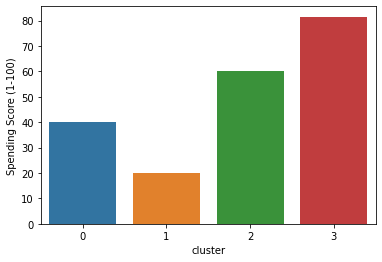

In [76]:
sns.barplot(x='cluster', y='Spending Score (1-100)', data=avg_df)

# Gender breakdown

In [79]:
df2 = pd.DataFrame(df.groupby(['cluster', 'Gender'])['Gender'].count())

In [80]:
df2

Gender
cluster Gender        
0       Female      36
        Male        28
1       Female      20
        Male        19
2       Female      34
        Male        23
3       Female      22
        Male        18

# Market Segmentation with SAP HANA